Day 1 과제:
1. y = (x + 3) ^3 에 대한 미분과정을 기록
2. electric.csv (x 전기 생산량, y 전기 사용량)
   x = 3.31 일 때 y 값 (low level, high level)

1. t = (x + 3) 
y = t^3
dy/dt = 3*t^2
dt / dx = 1

dy/dx = dy/dt * dt/dx = 3*t^2 * 1 = 3*(x+3)^2

### 2.1 low-level 계산

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import Adam

In [ ]:
df = pd.read_csv('data/electric.csv', index_col = 0)
x_data = df['전기생산량'].values
y_data = df['전기사용량'].values

# node로 정의, type = 실수화
x= tf.constant(x_data, tf.float32)
y= tf.constant(y_data, tf.float32)
w = tf.Variable(tf.random.uniform([1]), dtype = tf.float32)
b = tf.Variable(tf.random.uniform([1]), dtype = tf.float32)
epochs = 500

@tf.function
# 코스트 함수 정의
def compute_cost():
    hx = w * x + b
    c = tf.reduce_mean( (hx - y)**2)
    return c

0 cost :  3.6121654510498047 0.07221978902816772 0.7394106984138489
1 cost :  3.428025484085083 0.08221195638179779 0.7494028210639954
2 cost :  3.2488765716552734 0.09219101816415787 0.7593818306922913
3 cost :  3.074798583984375 0.10215122997760773 0.7693418860435486
4 cost :  2.9058685302734375 0.11208682507276535 0.7792772650718689
5 cost :  2.7421534061431885 0.1219918355345726 0.7891819477081299
6 cost :  2.5837111473083496 0.13186001777648926 0.7990496754646301
7 cost :  2.430593490600586 0.14168505370616913 0.8088741302490234
8 cost :  2.2828404903411865 0.1514604538679123 0.8186487555503845
9 cost :  2.140484094619751 0.16117960214614868 0.8283669352531433
10 cost :  2.003544807434082 0.1708357334136963 0.8380218744277954
11 cost :  1.872033715248108 0.18042197823524475 0.8476066589355469
12 cost :  1.7459510564804077 0.18993142247200012 0.8571143746376038
13 cost :  1.6252855062484741 0.1993570178747177 0.866537868976593
14 cost :  1.5100153684616089 0.20869171619415283 0.875

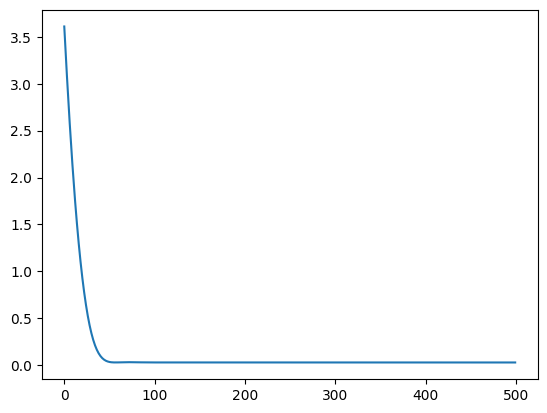

In [9]:
optimizer = Adam(learning_rate=0.01)
hist_cost = []
for i in range(epochs):
    with tf.GradientTape() as tape:
        cost = compute_cost()
    
    gradients = tape.gradient(cost, [w,b])
    optimizer.apply_gradients( zip(gradients,[w,b]))  ## = equals w.assign_sub(learning_rate * gradW) &  b.assign_sub(learning_rate * gradb)
    hist_cost.append(cost)
    print(i, 'cost : ', cost.numpy().item(), w.numpy().item(), b.numpy().item())

plt.plot(hist_cost)

전기생산량 3.310000 일 때 전기 사용량 = [2.5855312]


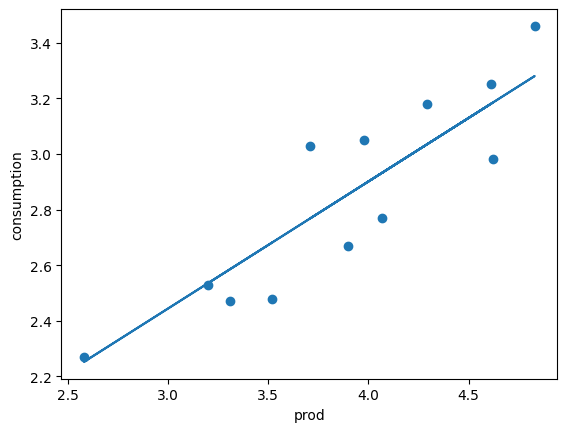

In [ ]:
def hxFn( xdata ):
    hx = w*xdata + b
    return hx.numpy()

x_pred = 3.31
print('전기생산량 %f 일 때 전기 사용량 =' % x_pred , hxFn(x_pred))
#print( f'전기생산량 {x_pred} 일 때 전기 사용량 ={hxFn(x_pred)}')

pred = hxFn(x)

plt.xlabel('prod')
plt.ylabel('consumption')
plt.plot(x, pred)
plt.scatter(x, y)
plt.show()

### 2.1 Keras 이용

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 1. w 와 b = w 1개, b 1개 (random 하게 정의됨)
# 2. hx = w*x + b
dense = Dense(units = 1, input_dim=1)   # w 1개 (units), input (number of feature) = 1
model = Sequential([dense]) # dense 내 weight, bias 를 학습시킴
model.compile(loss = 'mse', optimizer = Adam(0.1))
model.fit(x_data, y_data, epochs =500)

Epoch 1/500


c:\Python3109\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step - loss: 4.5834
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.7241
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.3673
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5033
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0927
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0521
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2518
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5380
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7783
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8974
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8810
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7565
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5701
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3709
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1997
Epoch 16/500
1/1 ━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
전기생산량 3.310000 일 때 전기 사용량 = [[2.5592535]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


C:\Users\wsadm\AppData\Local\Temp\ipykernel_13444\4079060635.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('전기생산량 %f 일 때 전기 사용량 =' % x_pred , y_pred )


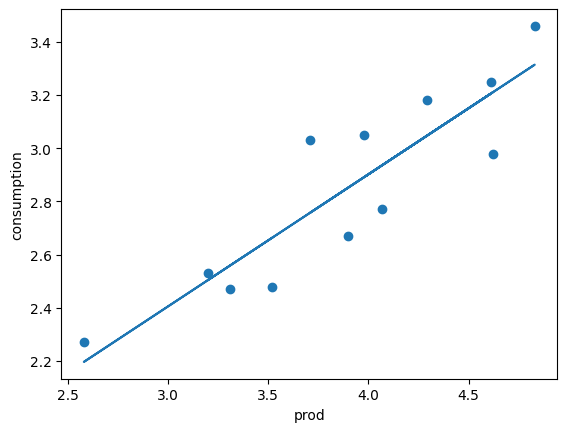

In [13]:
x_pred = np.array([3.31])
y_pred = model.predict(x_pred)
print('전기생산량 %f 일 때 전기 사용량 =' % x_pred , y_pred )

y_pred = model.predict(x_data)

plt.xlabel('prod')
plt.ylabel('consumption')
plt.plot(x_data, y_pred)
plt.scatter(x_data, y_data)
plt.show()